In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<class 'numpy.ndarray'>
(960, 1280, 3)


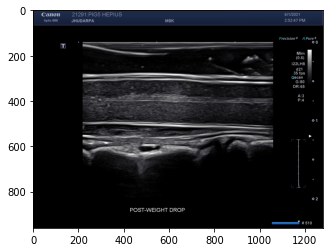

In [3]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/gdrive/MyDrive/HEPIUS/A0020_SAG_SPINE'
# image_path = '/content/gdrive/MyDrive/HEPIUS/A0177'
# image_path = '/content/gdrive/MyDrive/HEPIUS/A0150'

# Load the DICOM image using pydicom
dicom_image = pydicom.dcmread(image_path)

# Get the pixel array from the DICOM image
image = dicom_image.pixel_array

print(type(image))
print(image.shape)

# Plot the thresholded image
plt.imshow(image, cmap="gray")
plt.show()

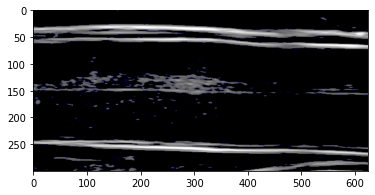

In [4]:
start_row, start_col = 250, 325
end_row, end_col = 550, 950
dicom_image = pydicom.dcmread(image_path)
image = dicom_image.pixel_array
cropped_image = image[start_row:end_row, start_col:end_col]

threshold = 80
cropped_image[cropped_image < threshold] = 0
plt.imshow(cropped_image, cmap="gray")
plt.savefig('crop_second', bbox_inches = 'tight')
# img = cropped_image

In [5]:
from skimage.transform import resize

resized_image = cropped_image[:,:,0]

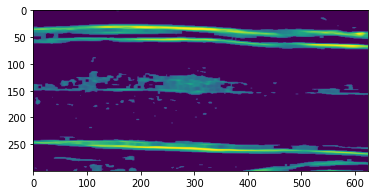

In [6]:
import cv2
kernel = np.ones((5, 5), np.uint8)
# img_er = cv2.erode(resized_image, kernel, iterations=1)
img_dil = cv2.dilate(resized_image, kernel, iterations=1)
img_er = cv2.erode(img_dil, kernel, iterations=1)
plt.imshow(img_er)
plt.savefig('pre_seg_second', bbox_inches = 'tight')

In [7]:
# Define the parameters for Chan-Vese segmentation
lambda1 = 1
lambda2 = 1
iterations = 20000
init_level_set = "checkerboard"
dt = 0.75

In [8]:
from skimage.segmentation import chan_vese
seg = chan_vese(img_er, mu=0.25, lambda1=lambda1, lambda2=lambda2, tol=1e-3, max_iter=iterations, init_level_set=init_level_set, dt=dt)

<ipython-input-8-1dc0270adc1f>:2: FutureWarning: `max_iter` is a deprecated argument name for `chan_vese`. It will be removed in version 1.0. Please use `max_num_iter` instead.
  seg = chan_vese(img_er, mu=0.25, lambda1=lambda1, lambda2=lambda2, tol=1e-3, max_iter=iterations, init_level_set=init_level_set, dt=dt)


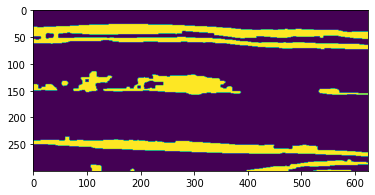

In [9]:
plt.imshow(seg)
plt.savefig('post_seg_second', bbox_inches = 'tight')

In [10]:
import numpy
grey = numpy.ones((len(seg),len(seg[0])))

for i in range(0,len(seg)):
  for j in range(0,len(seg[0])):
    if seg[i][j] == False:
      grey[i][j] = 1
    else:
      grey[i][j] = 250

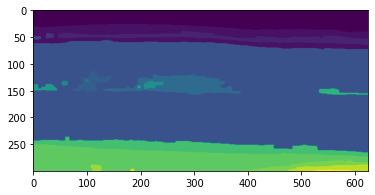

In [11]:
from skimage import measure
labels = measure.label(grey)

# plt.imshow(labels, cmap = 'Set2')
plt.imshow(labels)
plt.savefig('label_second', bbox_inches = 'tight')